# PUNTO 1

Primero instalamos las librerias necesarias

In [1]:
import pandas as pd
import os

Ubicamos la carpeta donde estan los archivos. Se utiliza la liberias OS para que sea robusto y se pueda abrir desde cualquier pc

In [2]:
current_directory = os.getcwd()
parent_directory=os.path.split(current_directory)[0]
ruta_archivo = os.path.join(parent_directory,'Prueba_Tecnica','Datos3' ,'OFEI1204.txt')

Debido a la estructura del archivo usamos la función with open para leer el archivo las lineas que necesitamos y colocar los respetivos titulos a las columnas

In [19]:
with open(ruta_archivo, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# Omitir las primeras dos líneas
lines = lines[2:]

# Preparar datos para el DataFrame
data = []
for line in lines:
    if line.strip():  # Ignorar líneas vacías
        # Dividir la línea en columnas y eliminar espacios en blanco
        columns = [col.strip() for col in line.strip().split(',')]
        data.append(columns)

# Crear un DataFrame con nombres de columnas
columnas = ['Agente', 'Planta'] + [f'Hora_{i}' for i in range(1, 25)]
df = pd.DataFrame(data, columns=columnas)

# Filtrar solo los registros Tipo D
df_filtrado = df[df['Planta'] == 'D']
df_filtrado.head(5)

,Agente,Planta,Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,Hora_7,Hora_8,...,Hora_15,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,Hora_24
1,CHIVOR1,D,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
2,CHIVOR2,D,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
3,CHIVOR3,D,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
4,CHIVOR4,D,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
5,CHIVOR5,D,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125


In [16]:
df_filtrado.to_csv('./punto1.csv')


# Punto2


Procedemos a cargar el segundo archivo Datos_Maestros_VF.xlsx y lo leemos con las funcion de pandas read_excel

In [22]:
archivo2 = os.path.join(parent_directory,'Prueba_Tecnica','Datos3' ,'Datos_Maestros_VF.xlsx')
df2 = pd.read_excel(archivo2)

Establecemos las columnas necesarias y aplicamos los filtros para dejar solo la información de interes

In [23]:
# Seleccionar las columnas necesarias
columnas_necesarias = [
    'Nombre visible Agente',
    'AGENTE (OFEI)',
    'CENTRAL (dDEC, dSEGDES, dPRU…)',
    'Tipo de central (Hidro, Termo, Filo, Menor)'
]

df_seleccionado = df2[columnas_necesarias]
df_seleccionado.rename(columns={'CENTRAL (dDEC, dSEGDES, dPRU…)': 'CENTRAL'}, inplace=True)
df_filtrado = df_seleccionado[
    (df_seleccionado['Nombre visible Agente'].isin(['EMGESA', 'EMGESA S.A.'])) &
    (df_seleccionado['Tipo de central (Hidro, Termo, Filo, Menor)'].isin(['H', 'T']))
]
df2=df_filtrado

C:\Users\jaime\AppData\Local\Temp\ipykernel_24168\3272737291.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleccionado.rename(columns={'CENTRAL (dDEC, dSEGDES, dPRU…)': 'CENTRAL'}, inplace=True)


Luego, cargamos el archivo dDEC1204.txt usando la funcion with open con la codificación que requiere el archivo

In [24]:
archivo3 = os.path.join(parent_directory,'Prueba_Tecnica','Datos3' ,'dDEC1204.txt')

In [25]:
# Intentar con una codificación alternativa
with open(archivo3, 'r', encoding='ISO-8859-1') as file:
    lines = file.readlines()

# Preparar datos para el DataFrame
data = []
for line in lines:
    if line.strip():  # Ignorar líneas vacías
        # Dividir la línea en columnas y eliminar espacios en blanco
        columns = [col.strip() for col in line.strip().split(',')]
        data.append(columns)

# Crear un DataFrame con nombres de columnas
columnas = ['CENTRAL'] + [f'Hora_{i}' for i in range(1, 25)]
df3 = pd.DataFrame(data, columns=columnas)
df3['CENTRAL'] = df3['CENTRAL'].str.replace('"', '', regex=False)
df3.head(5)

,CENTRAL,Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,Hora_7,Hora_8,Hora_9,...,Hora_15,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,Hora_24
0,AG_ARGOSCTG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AG_ARGOSYUM,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AG_ELCAIRO,0,0,0,1,3,3,3,3,3,...,3,0,0,0,0,1,3,3,3,3
3,AG_REFICAR,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4,AG_UNIBOL,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


usamos la función de pandas merge para unir por la columna llamada CENTRAL

In [26]:
# Realizar el merge por la columna 'Central'
new_df = pd.merge(df2, df3, on='CENTRAL')
new_df.head(5)

,Nombre visible Agente,AGENTE (OFEI),CENTRAL,"Tipo de central (Hidro, Termo, Filo, Menor)",Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,...,Hora_15,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,Hora_24
0,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
1,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
2,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
3,EMGESA,EMGESA S.A.,CTGEMG1,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EMGESA,EMGESA S.A.,CTGEMG2,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Convertimos las columnas de horas a formatos numerico y las sumamos

In [27]:
# Seleccionar solo las columnas de horas
horas_columnas = [col for col in new_df.columns if col.startswith('Hora_')]

# Convertir las columnas de horas a tipo entero
new_df[horas_columnas] = new_df[horas_columnas].astype(int)

# Calcular la suma horizontal para cada planta
new_df['Suma_Horas'] = new_df[horas_columnas].sum(axis=1)
new_df.head(5)

,Nombre visible Agente,AGENTE (OFEI),CENTRAL,"Tipo de central (Hidro, Termo, Filo, Menor)",Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,...,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,Hora_24,Suma_Horas
0,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,8736
1,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,8736
2,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,8736
3,EMGESA,EMGESA S.A.,CTGEMG1,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,EMGESA,EMGESA S.A.,CTGEMG2,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Seleccionamos las filas en que la suma sea mayor a 0.

In [28]:
df_final=new_df[new_df['Suma_Horas']>0]
df_final.head(5)

,Nombre visible Agente,AGENTE (OFEI),CENTRAL,"Tipo de central (Hidro, Termo, Filo, Menor)",Hora_1,Hora_2,Hora_3,Hora_4,Hora_5,Hora_6,...,Hora_16,Hora_17,Hora_18,Hora_19,Hora_20,Hora_21,Hora_22,Hora_23,Hora_24,Suma_Horas
0,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,8736
1,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,8736
2,EMGESA,EMGESA S.A.,BETANIA,H,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,8736
6,EMGESA,EMGESA S.A.,ELQUIMBO,H,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,2040
7,EMGESA,EMGESA S.A.,ELQUIMBO,H,85,85,85,85,85,85,...,85,85,85,85,85,85,85,85,85,2040


In [29]:
df_final.to_csv('./punto2.csv')

# Punto 3

Seleccione nombre, apellido y salario de todos los empleados. 

![alt text](image.png)

Seleccione nombre, apellido y salario de todos los empleados que ganen más 
de 4 millones.

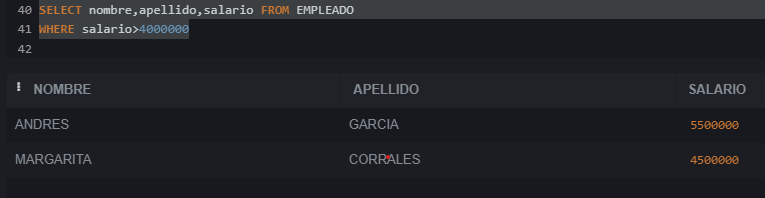

Cuente los empleados por sexo. 

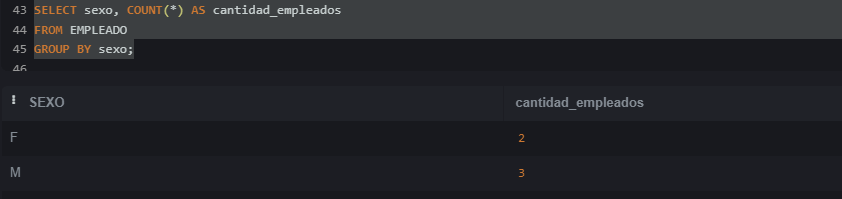

Seleccione los empleados que no han hecho solicitud de vacaciones. 

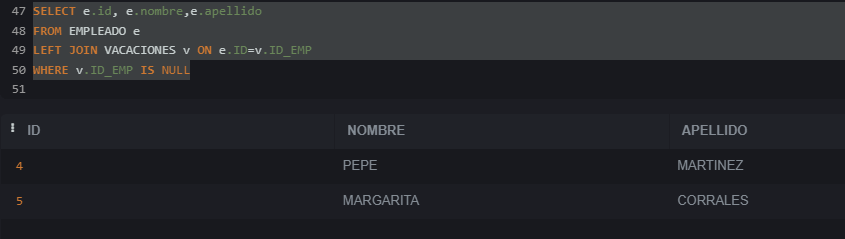

Seleccione los empleados que tengan más de una solicitud de vacaciones y 
muestre cuantas solicitudes tienen los que cumplen. 

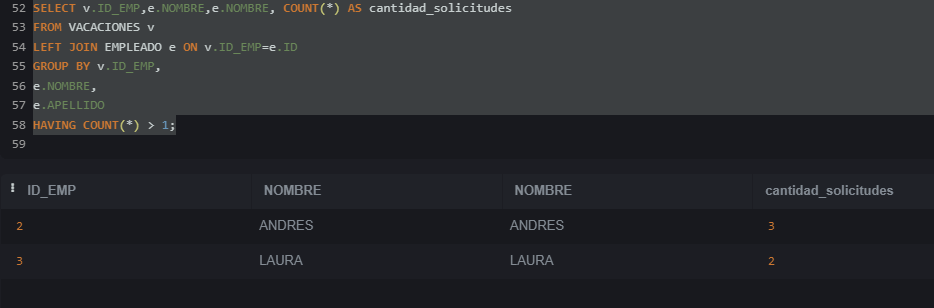

Determine el salario promedio de los empleados. 

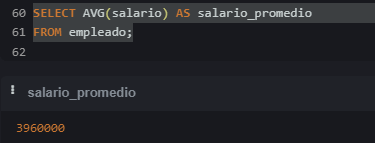

Determine la cantidad de días promedio solicitados de vacaciones por cada 
empleado. 

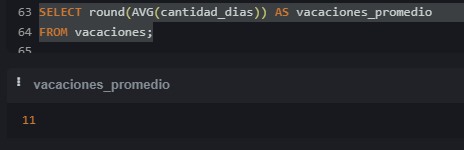

Seleccione el empleado que mayor cantidad de días de vacaciones ha 
solicitado, muestre el nombre, apellido y cantidad de días totales solicitados. 

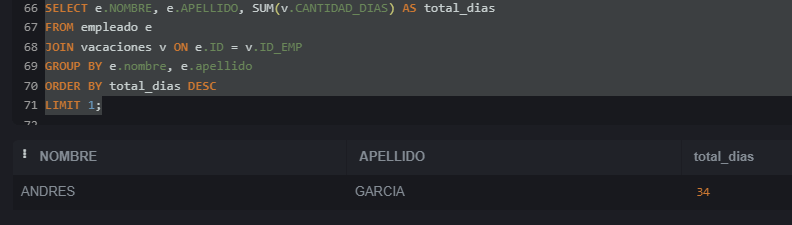

Consulte la cantidad de días aprobados y rechazados por cada empleado, 
en caso de no tener solicitudes mostrar 0. 

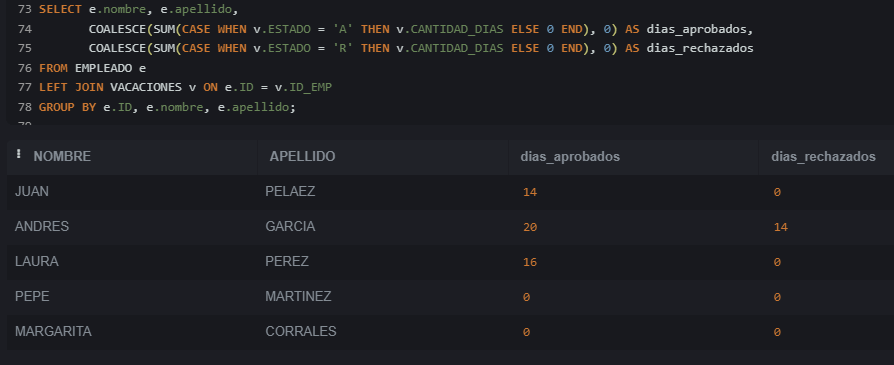